<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  <b>RAINFO</b> – <b>RAINFALL FORECASTING USING METEOROLOGICAL OBSERVATIONS</b>
</div>

RAINFO is a machine learning-based predictive system designed to forecast rainfall using historical meteorological data. The project involved data preprocessing, feature selection, and implementation of  classification models to predict rainfall occurrence.

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Introduction
</div>


This dataset contains detailed meteorological information recorded in many locations of Austrailia for a specific period. It includes 23 attributes for each day, capturing various aspects of the weather. These attributes include:

- Date: The date of the weather observation.
- Location: The location where the observation was made.
- MinTemp: Minimum temperature of the day (in degrees Celsius).
- MaxTemp: Maximum temperature of the day (in degrees Celsius).
- Rainfall: Total rainfall recorded for the day (in millimeters).
- Evaporation: Total evaporation recorded for the day (in millimeters).
- Sunshine: Total hours of sunshine recorded for the day.
- WindGustDir: The direction of the strongest wind gust during the day.
- WindGustSpeed: The speed of the strongest wind gust during the day (in kilometers per hour).
- WindDir9am: The wind direction at 9 AM.
- WindDir3pm: The wind direction at 3 PM.
- WindSpeed9am: The wind speed at 9 AM (in kilometers per hour).
- WindSpeed3pm: The wind speed at 3 PM (in kilometers per hour).
- Humidity9am: The humidity level at 9 AM (percentage).
- Humidity3pm: The humidity level at 3 PM (percentage).
- Pressure9am: The atmospheric pressure at 9 AM (in hPa).
- Pressure3pm: The atmospheric pressure at 3 PM (in hPa).
- Cloud9am: The cloud cover at 9 AM (measured in oktas).
- Cloud3pm: The cloud cover at 3 PM (measured in oktas).
- Temp9am: The temperature at 9 AM (in degrees Celsius).
- Temp3pm: The temperature at 3 PM (in degrees Celsius).
- RainToday: Indicator of whether it rained today (Yes or No).
- RainTomorrow: Indicator of whether it rained the next day (Yes or No).

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Objective
</div>


*The primary objective is to train and develop a model that will predict from the given inputs if it will rain tomorrow or not.*

**1. Exploring and reading the dataset**
- Load the dataset "weatherAUS.csv" and examine its features.

**2. Cleaning and preprocessing the dataset**
- Handle missing values, duplicate values and outliers.
- Encode categorical features when necessary.

**3. Splitting the dataset**
- The dataset is split into training and testing data. The training data is used to train the data and the test data is used for evaluating the model on new unseen data.

**3. Training a couple of models**
- Different models are trained : Logistic Regression, Random Forest Classifier, KNN model, Decision Tree Classifier, XGBoost Classifier, Naive Bayes and CatBoost Classifier.

**4. Models are evaluated and compared**
- All the models are then evaluated on different metrics such as Accuracy, Recall, Precision, F1 Score and confusion matrix and they are compared.

**5. Selcting the Model**
- The best model satisfying all the required metrics is selected

**6. Save the model**
- The model is then saved.


<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Installing necessary Libraries
</div>


In [1]:
# !pip install pandas matplotlib seaborn category_encoders scikit-learn xgboost catboost

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Data Cleaning
</div>


In [2]:
# importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the csv file and store it as dataframe
df = pd.read_csv("weatherAUS.csv")

In [4]:
# it displays the first 5 data of the dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Checking skewness to choose the best values(mean/median) to fill in the null values.

In [9]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
      'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
skew_value = df[columns].skew()
print(f"Skewness: {skew_value}")

Skewness: MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64


# Skewness
Skewness is a measure of how asymmetrical or uneven the data is. It shows if more data is on the left or right of the average.

- Skewness ≈ 0 → Symmetrical or data is balanced (use mean)

- Skewness > 1 or < -1 → Highly skewed (use median)

- Between -1 and 1 → Moderately skewed (mean can be okay, but median is safer)

According to the skew value, it is then decided to fill the columns' null values with either median or mean values.

For string values, we are using mode.

### Filling the respective columns with mean, median, mode 

In [10]:
median_cols = ['MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' , 'Cloud9am' , 'Cloud3pm', 'Temp3pm']
mean_cols = ['MinTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am']
mode_cols = ['WindGustDir', 'WindDir9am','WindDir3pm', 'RainToday', 'RainTomorrow']

In [11]:
def fill_missing_values(df, median_cols=[], mean_cols=[], mode_cols=[]):
    # Fill with median
    for col in median_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # Fill with mean
    for col in mean_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # Fill with mode
    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df


In [12]:
# function calling
df = fill_missing_values(df, median_cols, mean_cols, mode_cols)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [13]:
df.isnull().sum() # all null values are filled 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
df.duplicated().sum() # checking for the presence of duplicates

0

In [15]:
df.to_csv("cleaned_data.csv") ## final cleaned data is exported

In [16]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [17]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Data Preprocessing and Feature Reduction
</div>


Data Preprocessing is the process of transforming and organizing the data into a structured format suitable for analysis and machine learning. It includes tasks such as encoding, feature scaling and dimensionality reduction to enhance the performance and efficacy of models.

### Target Encoding

It transforms the categorical column Location based on its relationship with the target variable RainTomorrow.
Better than OneHot when there are many categories and a need to preserve target signal.

In [18]:
# Target Encoding
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Location'])
df = encoder.fit_transform(df, df['RainTomorrow'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,0.073511,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,0.073511,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,0.073511,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,0.073511,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Encoding other string values to numerical values using dummy variables

In [19]:
df_encoded = pd.get_dummies(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]).astype(int)

In [20]:
df_encoded

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145458,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_encoded.columns

Index(['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW'],
      dtype='object')

### Label Encoding

Encoding 'Yes' to 1 and 'No' to 0.

In [22]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [24]:
#Merging the df with the encoded df
merged_df = pd.concat([df,df_encoded], axis = 'columns')
merged_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,0.073511,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,0.073511,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,0.073511,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,0,0,0,0,0,0,0,0,1,0
145458,2017-06-24,0.073511,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# As the columns are now encoded the former columns shall be dropped as keeping them would be redundanct and might cause errors in modeling. 
# Also dropping the columns that doesn't have much affect in training.
merged_df = merged_df.drop(df[['Date','Location','WindGustDir','WindDir9am','WindDir3pm' ]], axis = 'columns')
merged_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0
145458,7.8,27.0,0.0,4.8,8.4,28.0,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Finding the correlation matrix to find the dependencies of two features
corr_matrix = merged_df.corr()

In [27]:
# Visualizing the Matrix
import seaborn as sns
plt.figure(figsize=(100,95))
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm')

<Axes: >

In [28]:
merged_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'Win

In [29]:
# It is found that the wind direction has less correlation so they are dropped
columns_to_drop = [
    'WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
    'WindGustDir_NE','WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW',
    'WindGustDir_S','WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
    'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
    
    'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
    'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
    'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
    'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
    
    'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
    'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
    'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
    'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW'
]

final_df = merged_df.drop(columns=columns_to_drop, axis=1)


In [30]:
final_df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,1
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0


In [31]:
final_df.shape

(145460, 18)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Train-Test Split
</div>


### The data is split into training and testing set

- Training set → Used to train the model

- Testing set → Used to evaluate how well the model performs on unseen data



In this case, training data is 70% and testing data is 30%

In [32]:
from sklearn.model_selection import train_test_split
X_full = final_df.drop('RainTomorrow', axis=1)
y = final_df['RainTomorrow']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.3, random_state=42)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Feature Selection
</div>


Feature selection is choosing the most important features that actually helps the model make better predictions — and removing the rest.

Checking different techniques like correlation matrix and feature inportance to select the best features.

In [33]:
final_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733344,0.102297,0.364794,0.032616,0.171937,0.173530,0.173073,-0.230970,0.005995,-0.423584,-0.433147,0.043094,0.000188,0.897692,0.698564,0.054559,0.082173
MaxTemp,0.733344,1.000000,-0.073563,0.447289,0.315487,0.066451,0.014389,0.049507,-0.497960,-0.498792,-0.308274,-0.396583,-0.232311,-0.218368,0.879114,0.968332,-0.225192,-0.156523
Rainfall,0.102297,-0.073563,1.000000,-0.041371,-0.168777,0.125109,0.084586,0.055688,0.220704,0.247926,-0.158819,-0.119402,0.164202,0.139380,0.010896,-0.077466,0.502807,0.233877
Evaporation,0.364794,0.447289,-0.041371,1.000000,0.279210,0.149942,0.148681,0.101264,-0.384208,-0.293690,-0.213741,-0.233685,-0.169494,-0.160652,0.425673,0.434014,-0.138946,-0.088709
Sunshine,0.032616,0.315487,-0.168777,0.279210,1.000000,-0.031229,-0.012197,0.023176,-0.329936,-0.430351,0.035856,-0.010509,-0.505488,-0.526045,0.191347,0.331676,-0.234048,-0.319412
WindGustSpeed,0.171937,0.066451,0.125109,0.149942,-0.031229,1.000000,0.578744,0.657975,-0.208887,-0.026822,-0.425879,-0.384208,0.046261,0.072894,0.145810,0.032375,0.145332,0.220144
WindSpeed9am,0.173530,0.014389,0.084586,0.148681,-0.012197,0.578744,1.000000,0.512279,-0.268219,-0.031005,-0.215334,-0.165383,0.006593,0.028376,0.127560,0.004806,0.098901,0.086746
WindSpeed3pm,0.173073,0.049507,0.055688,0.101264,0.023176,0.657975,0.512279,1.000000,-0.143312,0.016284,-0.277581,-0.239618,0.031498,0.010460,0.161055,0.027529,0.077084,0.084214
Humidity9am,-0.230970,-0.497960,0.220704,-0.384208,-0.329936,-0.208887,-0.268219,-0.143312,1.000000,0.659072,0.131503,0.176009,0.355700,0.278008,-0.469641,-0.490939,0.347034,0.251470
Humidity3pm,0.005995,-0.498792,0.247926,-0.293690,-0.430351,-0.026822,-0.031005,0.016284,0.659072,1.000000,-0.025848,0.048695,0.396986,0.403395,-0.216964,-0.555559,0.367937,0.433179


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_full, y_train_full)

importances = model.feature_importances_
feature_names = X_train_full.columns

# Display importance
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

MinTemp: 0.0583
MaxTemp: 0.0578
Rainfall: 0.0607
Evaporation: 0.0322
Sunshine: 0.0594
WindGustSpeed: 0.0638
WindSpeed9am: 0.0401
WindSpeed3pm: 0.0418
Humidity9am: 0.0631
Humidity3pm: 0.1829
Pressure9am: 0.0634
Pressure3pm: 0.0744
Cloud9am: 0.0236
Cloud3pm: 0.0389
Temp9am: 0.0559
Temp3pm: 0.0573
RainToday: 0.0263


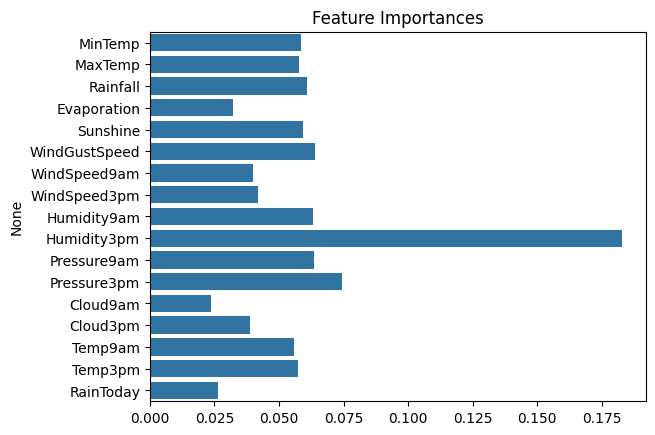

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()

## Feature Importance
This value determines how much one feature is important for predicting.

From comparing the values, the selected features are finalized.

In [36]:
selected_features = ['Rainfall', 'Humidity3pm', 'Humidity9am', 'Sunshine','MinTemp', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']

In [37]:
# Selected features are the inputs
X = final_df[['Rainfall', 'Humidity3pm', 'Humidity9am', 'Sunshine','MinTemp', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']]
X

,Rainfall,Humidity3pm,Humidity9am,Sunshine,MinTemp,Pressure9am,Pressure3pm,WindGustSpeed
0,0.6,22.0,71.0,8.4,13.4,1007.7,1007.1,44.0
1,0.0,25.0,44.0,8.4,7.4,1010.6,1007.8,44.0
2,0.0,30.0,38.0,8.4,12.9,1007.6,1008.7,46.0
3,0.0,16.0,45.0,8.4,9.2,1017.6,1012.8,24.0
4,1.0,33.0,82.0,8.4,17.5,1010.8,1006.0,41.0
...,...,...,...,...,...,...,...,...
145455,0.0,24.0,51.0,8.4,2.8,1024.6,1020.3,31.0
145456,0.0,21.0,56.0,8.4,3.6,1023.5,1019.1,22.0
145457,0.0,24.0,53.0,8.4,5.4,1021.0,1016.8,37.0
145458,0.0,24.0,51.0,8.4,7.8,1019.4,1016.5,28.0


In [38]:
# This is the target variable for which we will be predicting the outcome
y = final_df['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [39]:
# Again splitting the data, for the final selected features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Training
</div>


# Training Different Models for Prediction

### Need of StandardScaler
It is used to standardize the features.

Imagine you're comparing height in cm (like 150–200) and temperature in °C (like 20–30). Some machine learning models give more importance to bigger numbers. That’s unfair — all features should be treated equally.

So we standardize them to make the numbers easier to compare.

## 1.Logistic Regression Model

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [41]:
log_reg.score(X_test,y_test)

0.8404601494110637

## 2.Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=100,         # Fewer trees may help
    max_depth=10,             # Limit the depth of trees
    min_samples_split=10,     # Minimum samples to split an internal node
    min_samples_leaf=4,       # Minimum samples at a leaf node
    max_features='sqrt',      # Reduces randomness in splits
    random_state=42
)

In [43]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [44]:
train_accuracy = RF.score(X_train, y_train)
train_accuracy

0.8612873445817211

In [45]:
RF.score(X_test, y_test)

0.8473807232228792

In [46]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## 3.KNN Model

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune k later
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
y_pred_KNN = knn.predict(X_test_scaled)

In [51]:
train_accuracy = knn.score(X_train_scaled, y_train)
train_accuracy

0.8762644615112648

In [52]:
knn.score(X_test_scaled, y_test)

0.833631238828544

## 4. Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,          # limit depth
    min_samples_split=10, # minimum samples to split node
    min_samples_leaf=5,   # minimum samples per leaf
    random_state=42
)
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [55]:
print("Train Acc:", dt.score(X_train_scaled, y_train))
print("Test Acc:", dt.score(X_test_scaled, y_test))

Train Acc: 0.8388756850189546
Test Acc: 0.8356936614876942


In [56]:
y_pred_dt = dt.predict(X_test_scaled)

## 5. XGBoost Classifier

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [60]:
train_accuracy = xgb.score(X_train_scaled, y_train)
train_accuracy

0.8737502700791577

In [61]:
xgb.score(X_test_scaled, y_test)

0.8492369036161144

## 6. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nb = GaussianNB()
nb.fit(X_train, y_train)  # unscaled works better here

GaussianNB()

In [64]:
y_pred_nb = nb.predict(X_test)

In [65]:
train_accuracy = nb.score(X_train, y_train)
train_accuracy

0.8233682308342009

In [66]:
nb.score(X_test, y_test)

0.8255190430358862

## 7. CatBoost

In [67]:
from catboost import CatBoostClassifier

In [68]:
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)

In [69]:
y_pred_cat = cat.predict(X_test)

In [70]:
train_accuracy = cat.score(X_train, y_train)
train_accuracy

0.8732690381253561

In [71]:
cat.score(X_test,y_test)

0.8512764104679408

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Evaluation
</div>


# Comparing different evaluation metrics of each Model

Model: Logistic Regression
Accuracy: 0.8404601494110637
Precision: 0.7217549068118093
Recall: 0.45342451559423896
F1 Score: 0.5569555810105639
Confusion Matrix:
 [[ 4376  5275]
 [ 1687 32300]]


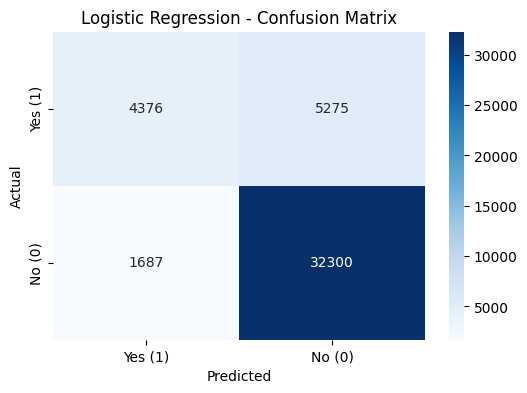



Model: Random Forest
Accuracy: 0.8473807232228792
Precision: 0.7629681730262001
Recall: 0.4495907159879805
F1 Score: 0.5657843265093232
Confusion Matrix:
 [[ 4339  5312]
 [ 1348 32639]]


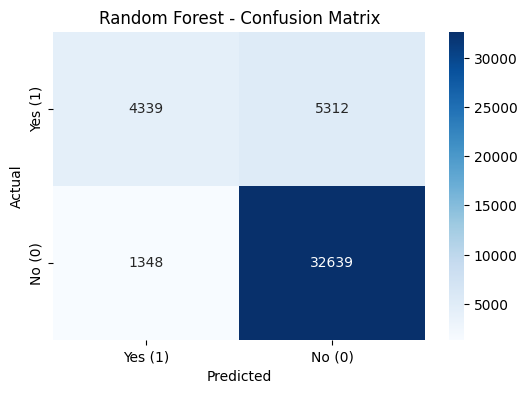



Model: KNN
Accuracy: 0.833631238828544
Precision: 0.6691186872259159
Recall: 0.4901046523676303
F1 Score: 0.5657894736842105
Confusion Matrix:
 [[ 4730  4921]
 [ 2339 31648]]


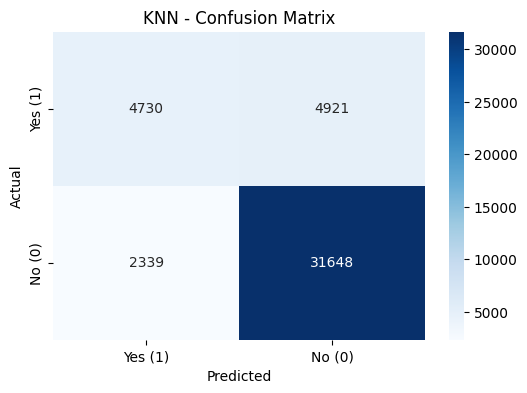



Model: Decision Tree
Accuracy: 0.8356936614876942
Precision: 0.7611029256998527
Recall: 0.3746761993575795
F1 Score: 0.5021524788223858
Confusion Matrix:
 [[ 3616  6035]
 [ 1135 32852]]


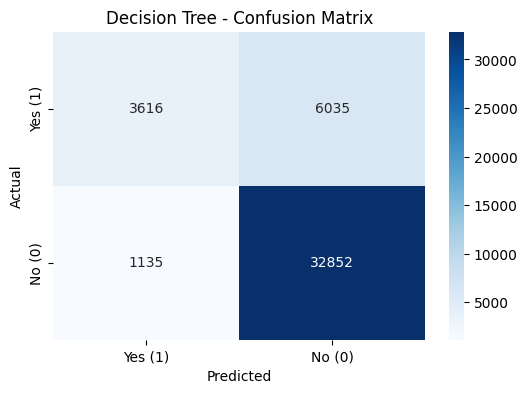



Model: XGBoost
Accuracy: 0.8492369036161144
Precision: 0.7351500306184936
Recall: 0.49756501916899804
F1 Score: 0.5934622752270902
Confusion Matrix:
 [[ 4802  4849]
 [ 1730 32257]]


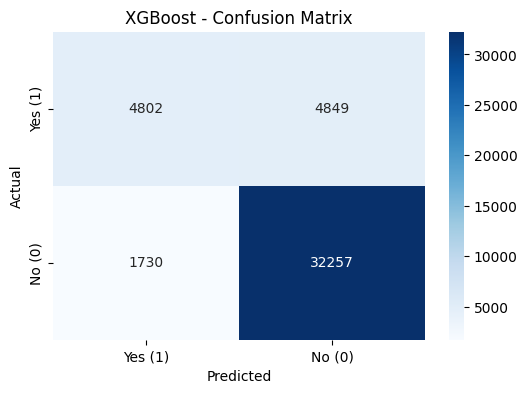



Model: Naive Bayes
Accuracy: 0.8255190430358862
Precision: 0.6452717158750535
Recall: 0.46875971401927263
F1 Score: 0.5430320489737126
Confusion Matrix:
 [[ 4524  5127]
 [ 2487 31500]]


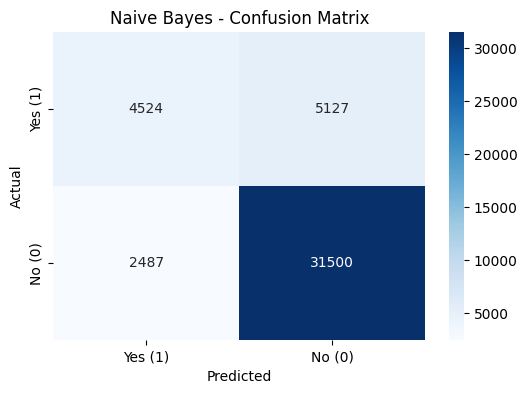



Model: CatBoost
Accuracy: 0.8512764104679408
Precision: 0.7447731144494347
Recall: 0.4982903326080199
F1 Score: 0.5970946113732307
Confusion Matrix:
 [[ 4809  4842]
 [ 1648 32339]]


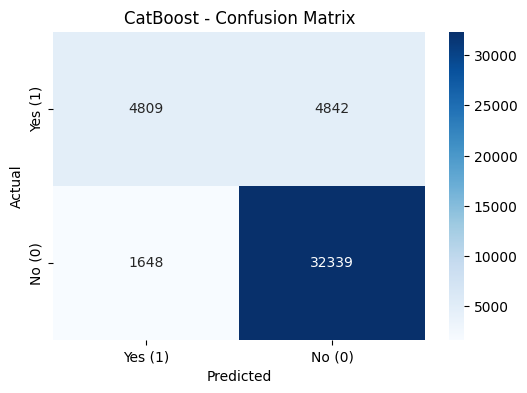

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    labels = [1, 0]  # 1 = Yes (positive), 0 = No

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

    # Generate confusion matrix with label order
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Yes (1)", "No (0)"],
                yticklabels=["Yes (1)", "No (0)"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n")

# Call the function for all models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(RF, X_test, y_test, "Random Forest")
evaluate_model(knn, X_test_scaled, y_test, "KNN")
evaluate_model(dt, X_test_scaled, y_test, "Decision Tree")
evaluate_model(xgb, X_test_scaled, y_test, "XGBoost")
evaluate_model(nb, X_test, y_test, "Naive Bayes")
evaluate_model(cat, X_test, y_test, "CatBoost")


## Metrics

- Accuracy: It is total correct predictions divided by total predictions.
- Precision: Checking the correctness of predictions i.e. if model predicts rainfall on 10 days , but it's actually rained on 6, then precision = 6/10 = 60%.
- Recall: It's about catching all the actual rainy days. e.g. There were 8 rainy days, model correctly predicted 6 of them.
Recall = 6 / 8 = 75%
- F1 Score: A balance between precision and recall.
- Confusion Matrix: Comparing model's predictions to the actual truth.


<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Selection
</div>


## Choosing the best model

Choosing the best model depends not only on accuracy score but also on precision, recall, f1 scores and confusion matrix.

Comparing the models above,

**CatBoost classifier** has the highest accuracy score of **85.13%**
- Precision - 74.48%
- Recall - 49.83%
- F1 Score - 59.71%

**XGBoost** competes with CatBoost Classifier having an accuracy score of **84.92%**
- Precision - 73.52%
- Recall - 49.76%
- F1 Score - 59.35%

**Random Forest** also performed consistently well with an accuracy score of **84.74%**
- Precision - 76.30%
- Recall - 44.96%
- F1 Score - 56.58%
  
Considering all performance metrics, **CatBoost Classifier** is chosen as the final model. It achieved the highest accuracy (**85.13%**) and the best F1 score (**59.71%**), indicating a strong balance between precision and recall. While XGBoost and Random Forest also performed well, CatBoost showed the most consistent and reliable results for rainfall prediction.

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Saving the model
</div>


Saving the model using pickle

In [72]:
#import the pickle module
import pickle

In [73]:
# Saving the trained CatBoost model to a file using pickle for future use
with open('catBoost_model', 'wb') as f:
    pickle.dump(cat, f)

In [74]:
# Loading the saved CatBoost model from the file for making predictions or evaluation
with open('catBoost_model', 'rb') as f:
    cat_model = pickle.load(f)

In [75]:
# Testing on some data
input_data = [[0.6, 22.0, 71.0, 8.4, 13.4, 1007.7, 1007.1, 44.0]]
prediction = cat_model.predict(input_data)
print(prediction)

[0]


<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Conclusion
</div>


### 📘 Conclusion

This notebook successfully demonstrates the end-to-end process of building a rainfall prediction model using historical weather data. After thorough data cleaning, feature selection, and model evaluation, the **CatBoostClassifier** emerged as the top performer with **85.13%** accuracy. The workflow included preprocessing, model training, and serialization for future use, providing a solid foundation for deploying predictive weather analytics.
